### 1. Two Sum

In [ ]:
class Solution:
    def twoSum(self, nums: List[int], target: int) -> List[int]:
        for i in range(len(nums)):
            for j in range(i + 1, len(nums)):
                if nums[i] + nums[j] == target:
                    return [i, j]

- I solved this problem by simply trying every combination of two numbers.

### 5. Longest Palindromic Substring

In [ ]:
class Solution:
    def longestPalindrome(self, s: str) -> str:

        def maxPalindrome(i,variant):
            max_string = ""
            l = i
            r = i if variant == "odd" else i+1 
            while l >= 0 and r < len(s):
                if s[l] == s[r]:
                    max_string = s[l:r+1]
                    l -= 1
                    r += 1
                else: break
            return max_string

        max_pali = ""
        for i in range(len(s)):
            pali_odd = maxPalindrome(i, "odd")
            pali_even = maxPalindrome(i, "even")
            pali = pali_odd if len(pali_odd) > len(pali_even) else pali_even
            if len(pali) > len(max_pali):
                max_pali = pali

        return max_pali

- This problem could be solved by iterating over `s` and calculating the maximum palindrome at every index.
- The helper function `maxPalindrome` calculates the largest possible palindrome at a given index `i` for a given `variant` (`"even"` or `"odd"` length) by expanding toward the left and the right as long as the string is a palindrome.
- We use this helper function to calculate the largest possible palindrome of even length and the largest possible palindrome of odd length at every index, and we keep track of the largest palindrome that we encounter throughout this process.

### 36. Valid Sudoku

In [ ]:
class Solution:
    def isValidSudoku(self, board: List[List[str]]) -> bool:
        # Step 1 validate rows
        valid = range(1, 10)
        isValid = True
        for i in range(len(board)):
            row = [int(val) for val in board[i] if val != "."]
            print(row)
            if not sorted(row) == sorted(list(set(row))):
                isValid = False
            for val in row:
                if not val in valid:
                    isValid = False
        print(f'rows are {isValid}')
        # Step 2 validate cols
        colCount = 0
        while colCount < len(board):
            col = []
            for i in range(len(board)):
                col.append(board[i][colCount])
            col = [int(val) for val in col if val != "."]
            print(col)
            if not sorted(col) == sorted(list(set(col))):
                isValid = False
            for val in col:
                if not val in valid:
                    isValid = False
            colCount += 1
        print(f'cols are {isValid}')
        # Step 3 validate blocks
        layer = 0
        block = 0
        for i in range(len(board)):
            vals = []
            if block == 9:
                block = 0
                layer += 3
            for j in range(3):
                for i in range(3):
                    vals.append(board[block + j][layer + i])
            vals = [int(val) for val in vals if val != "."]
            print(vals)
            if not sorted(vals) == sorted(list(set(vals))):
                isValid = False
            for val in vals:
                if not val in valid:
                    isValid = False
            block += 3
        print(f'blocks are {isValid}')
        return isValid

- This task was pretty straightforward. I went through it in three distinct steps.
- First, I extracted the rows of the board, and validated them by making sure that each `row` only contains unique values from 1 to 9.
- The second and third step follow the exact same pattern, although I had to put some more effort into properly indexing the blocks in step three.

### 49. Group Anagrams

In [ ]:
class Solution:
    def groupAnagrams(self, strs: List[str]) -> List[List[str]]:
        res = defaultdict(list)

        for string in strs:
            count = [0] * 26

            for c in string:
                count[ord(c) - ord('a')] += 1

            res[tuple(count)].append(string)

        return res.values()

- The way this works is, we create a list `count` for each string, which holds 26 fields, representing the frequency of the lowercase letters of the alphabet. 
- Then we go through the characters of each string and populate `count`. For example the string `cab` would result in `[1,1,1,0,0,...]`
- This will then be used as the key in the `res` dictionary, where we append the string to the corresponding list of values.
- These values are then returned as the result.
- An intuitive way to think about this, is that we are using histograms as keys, and lists of values fitting the pattern of the histogram, as values.

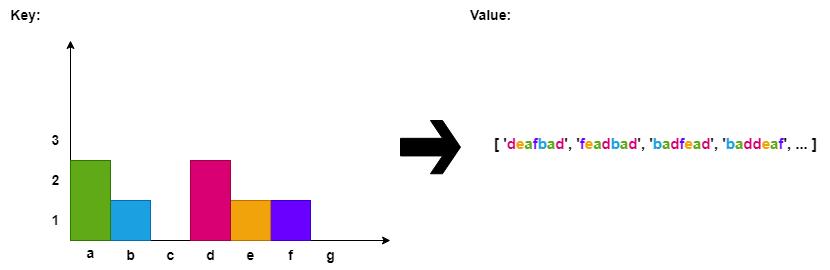

### 118. Pascal's Triangle

In [ ]:
class Solution:
    def generate(self, numRows: int) -> List[List[int]]:
        if numRows == 0: return []
        if numRows == 1: return [[1]]
        if numRows == 2: return [[1],[1,1]]
        
        def getNext(row):
            n = [1]*(len(row)+1)
            for i in range(len(row)-1):
                n[i+1] = row[i] + row[i+1]
            return n
    
        res = [[1],[1,1]]
        r = 2
        while r < numRows:
            res.append(getNext(res[r-1]))
            r += 1

        return res

- I solved this problem by defining a helper function `getNext` that will calculate the next `row` of the **Pascal Triangle** for any given `row`.
- All that was left to do then was to calculate the rows up until `numRows`.

### 128. Longest Consecutive Sequence

In [ ]:
class Solution:
    def longestConsecutive(self, nums: List[int]) -> int:
        if nums == []:
            return 0
        s_nums = sorted(list(set(nums)))
        count = 1
        res = 1
        for i in range(len(s_nums) - 1):
            if s_nums[i] == s_nums[i+1] - 1:
                count += 1
                if i == len(s_nums) - 2 and count > res:
                    res = count
            else:
                if count > res:
                    res = count
                count = 1
        return res

- To solve this problem, I first converted `nums` into a sorted and unique list `s_nums`. 
- Similarly to finding the maximum value in a list, I traversed `s_nums` and saved the state of the longest sequence of elements increasing by steps of one, inside of `res`.

### 217. Contains Duplicate 

In [ ]:
class Solution:
    def containsDuplicate(self, nums: List[int]) -> bool:
        return not len(set(nums)) == len(nums)

- A list contains at least one duplicate if the length of its set is less than its length.

### 225. Implement Stack using Queues

In [ ]:
class MyStack:

    def __init__(self):
        self.s = collections.deque()

    def push(self, x: int) -> None:
        self.s.append(x)
        # reverse the order such that the top of the stack is always at the front
        for _ in range(len(self.s)-1):
            self.s.append(self.s.popleft())
        
    def pop(self) -> int:
        return self.s.popleft()

    def top(self) -> int:
        return self.s[0]

    def empty(self) -> bool:
        return len(self.s) == 0
        


# Your MyStack object will be instantiated and called as such:
# obj = MyStack()
# obj.push(x)
# param_2 = obj.pop()
# param_3 = obj.top()
# param_4 = obj.empty()

- The restrictions here were basically that you were not allowed to use the `pop` operation or access an index other than the first index in the queue.
- To get around these restrictions, the queue representing the stack, `s`, had to be reordered on every `push` operation such that the newly appended item would be rotated towards the front by repeatedly popping the item in the front position and appending it to the back of the queue.

### 238. Product of Array Except Self

In [ ]:
class Solution:
    #step 1: save the product for each unique number in a dict
    #step 2: go through nums and for each number paste the corresponding value of the dict into the result array 
    def prod(self, nums: List[int]) -> int:
        prod = 1
        for i in range(len(nums)):
            prod = prod * nums[i]
        return prod

    def productExceptSelf(self, nums: List[int]) -> List[int]:
        unique = list(set(nums))
        uniqueDict = defaultdict(int)
        for num in unique:
            temp = nums.copy()
            nums.remove(num)
            uniqueDict[num] = self.prod(nums)
            nums = temp 
        res = [0] * len(nums)
        for count, num in enumerate(nums):
            res[count] = uniqueDict[num]
        return res

- What I have done to drastically improve the performance and reduce the complexity to O(n), was to first retrieve all unique values inside of `nums`, and save them inside of `unique`.
- Then I created a dictionary `uniqueDict`, which would hold the product corresponding to each of the unique numbers.
- Lastly I went through `nums` and populated the `res` list with the matching dictionary entries for each `num` in `nums`.

### 242. Valid Anagram

In [2]:
class Solution:
    def isAnagram(self, s: str, t: str) -> bool:
        for char in s:
            if t == '':
                return False
            t = t.replace(char, '', 1)
        if t != '':
            return False
        return True

- We iterate over the letters in `s` and replace them in `t`. If `s` and `t` are not both empty afterwards, they are not anagrams.

### 338. Counting Bits

In [ ]:
class Solution:
    def countBits(self, n: int) -> List[int]:
        
        res = []
        for b in range(n+1):
            c = collections.Counter(bin(b))
            res.append(c['1'] if '1' in c else 0)
        return res

- I simply iterated through the range from `0` to `n` and counted the number of 1s in the binary representation of each number.

### 347. Top K Frequent Elements

In [ ]:
class Solution:
    def topKFrequent(self, nums: List[int], k: int) -> List[int]:
        counter = dict(Counter(nums))
        counter = dict(sorted(counter.items(), key=lambda item: item[1]))
        counterList = list(reversed(list(counter.keys())))
        res = []
        for i in range(k):
            res.append(counterList[i])
        return res

- My thought process here was to use the `Counter` object from python to count the occurences of each number in `nums`, and return the `k` most frequent numbers.
- To retrieve the most frequent numbers, I sorted the `counter` dictionary by it's values (ascending), extracted the keys as `counterList`, reversed `counterList` for a descending ordering, and returned the `k` first keys.

### 459. Repeated Substring Pattern

In [ ]:
class Solution:
    def repeatedSubstringPattern(self, s: str) -> bool:
        def constructible(sub):
            constructed = ""
            while len(constructed) < len(s):
                constructed += sub
                if constructed != s[:len(constructed)]: return False
            return True
        
        for i in range(len(s)//2):
            if len(s)%(i+1): continue
            if constructible(s[:i+1]):
                return True
        return False

- We iterate over the first half of the given string `s` and try out every substring in that range using the helper function `constructible`.
- When a substring can be made into the original string, `constructible` returns `True`, and we return `True`.

### 647. Palindromic Substrings

In [ ]:
class Solution:
    def countSubstrings(self, s: str) -> int:
        
        def countPalis(i, variant):
            l = i
            r = i if variant == "odd" else i+1
            count = 0
            while l >= 0 and r <= len(s)-1:
                if s[l] == s[r]:
                    count += 1
                    l -= 1
                    r += 1
                else: break
            return count

        res = 0
        for i in range(len(s)):
            res += countPalis(i, "odd")
            res += countPalis(i, "even")
        return res

- The way I solved this problem was to count the number of palindromes of even and odd length that can be constructed via the method explained in the previous solution at every index and add them to the result, `res`. 

### 1337. The K Weakest Rows in a Matrix

In [ ]:
class Solution:
    def kWeakestRows(self, mat: List[List[int]], k: int) -> List[int]:
        indices = list(range(len(mat)))
        mat = list(zip(mat,indices))
        mat.sort(key=lambda x: len([ num for num in x[0] if num == 1 ]))
        return [ mat[i][1] for i in range(k) ]

- To solve this problem, I zipped the rows of the given matrix, `mat`, with their `indices` and then sorted them by the number of 1's they contain.
- Lastly, I returned the indices of the first `k` elements of the sorted matrix.